In [7]:
import numpy as np
import pandas as pd
from astropy.coordinates import SkyCoord
from astropy import units as u
from matplotlib import pyplot as plt

In [8]:
list(pd.read_csv('/home/rt2122/Data/detected_cats/full_pz_act_feb_rot_drop0.2_ep10_thr0.1_step8.csv'))

['RA',
 'DEC',
 'area',
 'min_rad',
 'max_rad',
 'mean_rad',
 'min_pred',
 'max_pred',
 'tRA',
 'tDEC',
 'status',
 'catalog',
 'M500',
 'z']

In [9]:
def comp_table(cat_file, prm_x=['min_rad', 'mean_rad', 'max_rad', 'min_pred', 'max_pred', 'area'], 
              prm_y=['z', 'M500'], figsize=(8, 24), in_val_pix=False):
    import numpy as np
    import pandas as pd
    from matplotlib import pyplot as plt
    from DS_Planck_Unet import val_pix
    from DS_healpix_fragmentation import radec2pix
    
    df = pd.read_csv(cat_file)
    df = df[df['status'] == 'tp']
    df = df[df['z'] != -1]
    if in_val_pix:
        pix2 = radec2pix(df['RA'], df['DEC'], 2)
        df = df[np.in1d(pix2, val_pix)]
    df.index = np.arange(len(df))
    
    _, ax = plt.subplots(len(prm_x), len(prm_y), figsize=figsize)
    for i, px in enumerate(prm_x):
        for j, py in enumerate(prm_y):
            ax[i][j].scatter(df[py], df[px], s=10)
            ax[len(prm_x) - 1][j].set_xlabel(py)
        ax[i][0].set_ylabel(px)

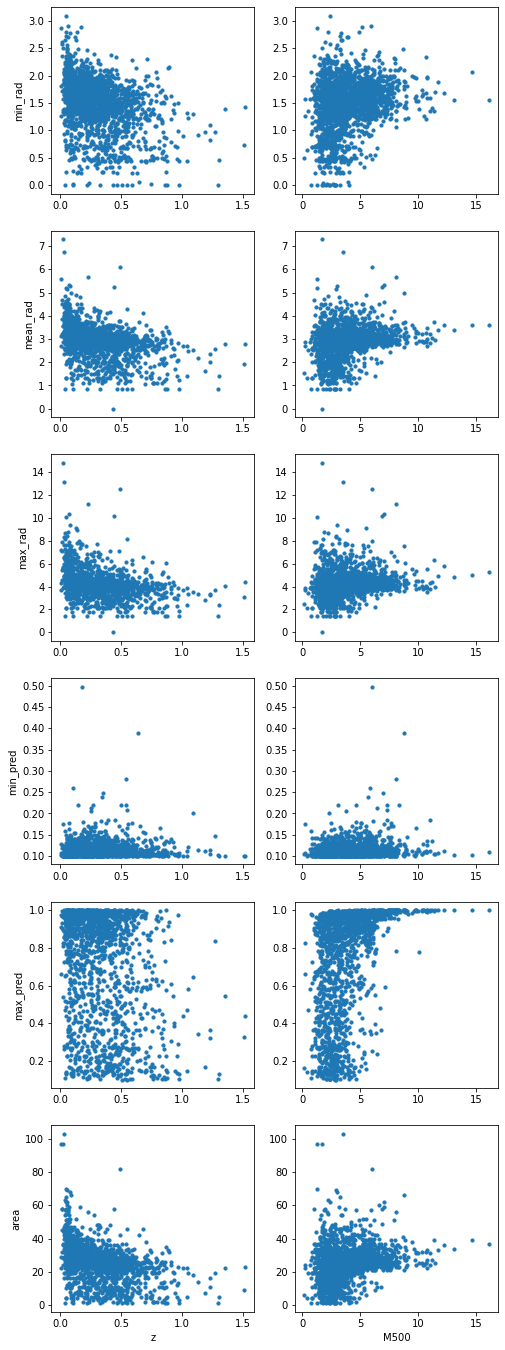

In [10]:
comp_table('/home/rt2122/Data/detected_cats/full_pz_rot28_thr0.1_step8_no_fn.csv')

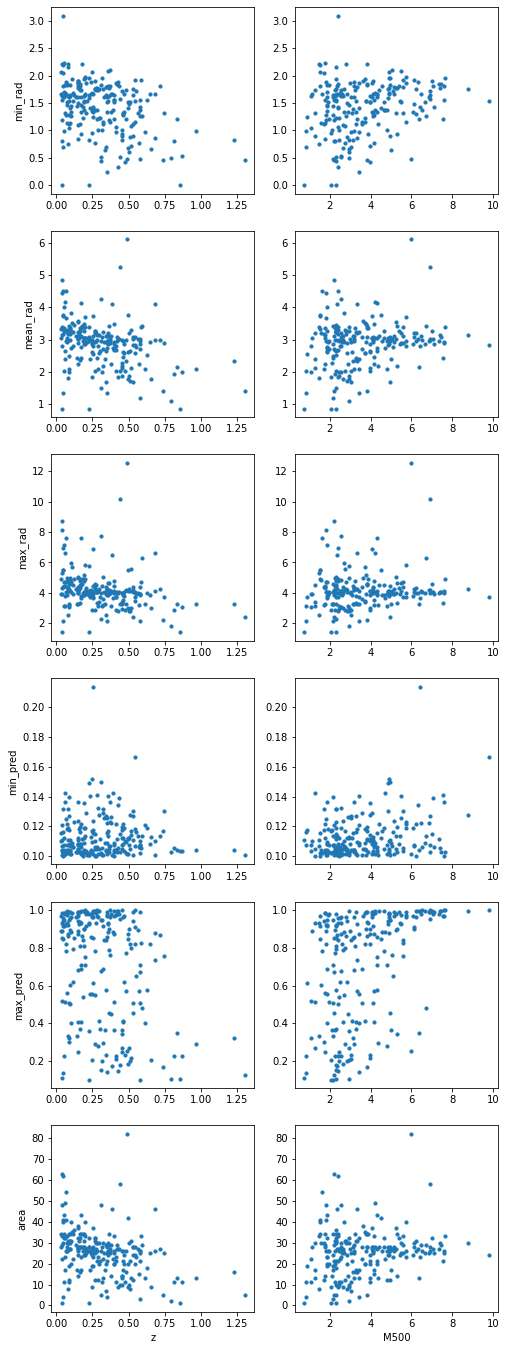

In [11]:
comp_table('/home/rt2122/Data/detected_cats/full_pz_rot28_thr0.1_step8_no_fn.csv', in_val_pix=True)

In [13]:
pz_rot = pd.read_csv('/home/rt2122/Data/detected_cats/full_pz_rot28_thr0.1_step8_no_fn.csv')
act = pd.read_csv('/home/rt2122/Data/original_catalogs/csv/ACT.csv')
pz_sc = SkyCoord(ra=np.array(pz_rot['RA'])*u.degree, dec=np.array(pz_rot['DEC'])*u.degree, frame='icrs')
act_sc = SkyCoord(ra=np.array(act['RA'])*u.degree, dec=np.array(act['DEC'])*u.degree, frame='icrs')
_, d2d, _ = act_sc.match_to_catalog_sky(pz_sc)
matched = d2d.degree < 5 / 60
act['matched'] = False
act['matched'].iloc[matched] = True

/home/rt2122/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


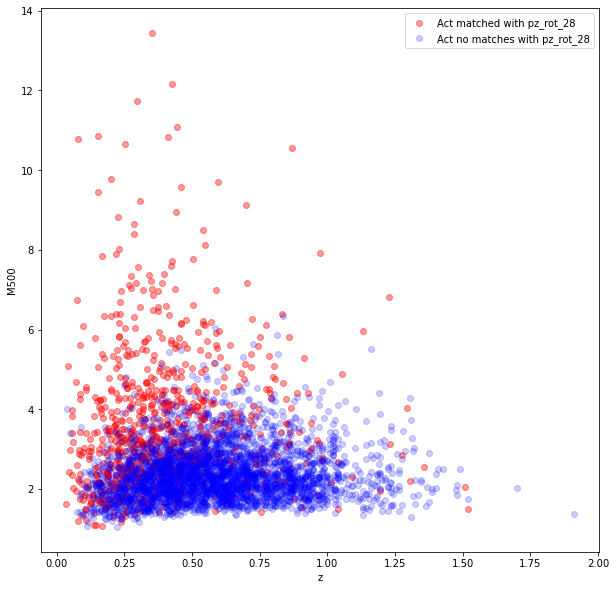

In [19]:
_, ax = plt.subplots(1, 1, figsize=(10, 10))
s = ax.scatter(act[act['matched']]['z'], act[act['matched']]['M500'], c='r', alpha=0.4)
s.set_label('Act matched with pz_rot_28')
s = ax.scatter(act[act['matched'] == 0]['z'], act[act['matched'] == 0]['M500'], c='b', alpha=0.2)
s.set_label('Act no matches with pz_rot_28')
ax.set_xlabel('z')
ax.set_ylabel('M500')
ax.legend()

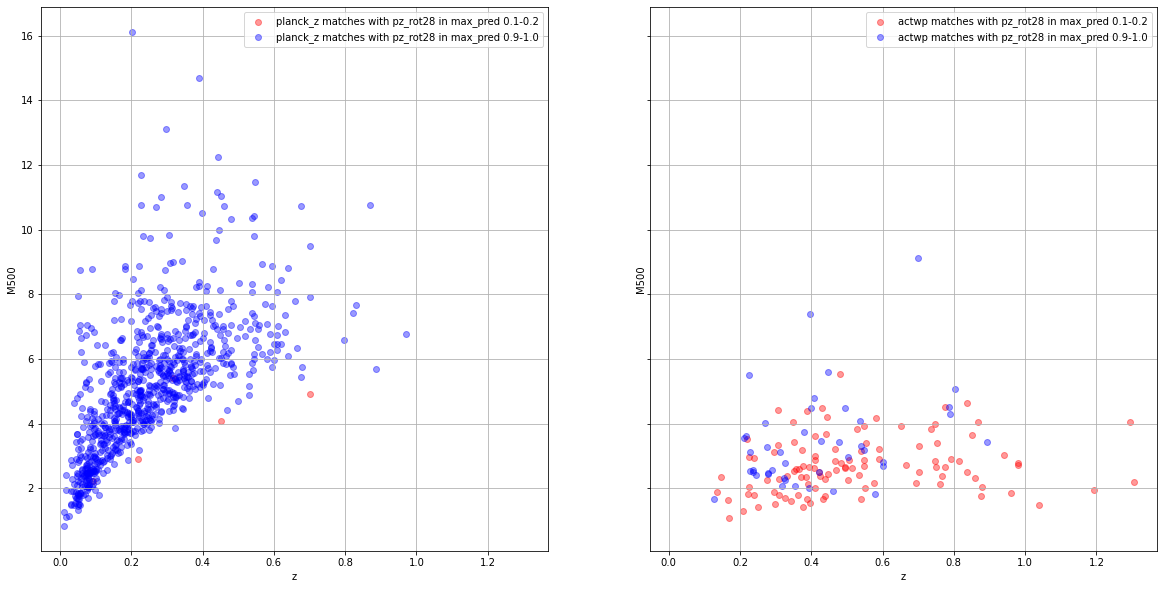

In [18]:
_, ax = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)
for i, cat in enumerate(['planck_z', 'actwp']):
    cur_df = pz_rot[pz_rot['catalog'] == cat]
    cur_df = cur_df[cur_df['status'] == 'tp']
    for st, en, c in [(0.1, 0.2, 'r'), (0.9, 1.0, 'b')]:
        df = cur_df[cur_df['max_pred'] <= en]
        df = df[df['max_pred'] >= st]
        s = ax[i].scatter(df['z'], df['M500'], c=c, alpha=0.4)
        s.set_label('{cat} matches with pz_rot28 in max_pred {min_p}-{max_p}'.format(
            cat=cat, min_p=st, max_p=en))
    ax[i].set_xlabel('z')
    ax[i].set_ylabel('M500')
    ax[i].grid()
    ax[i].legend()

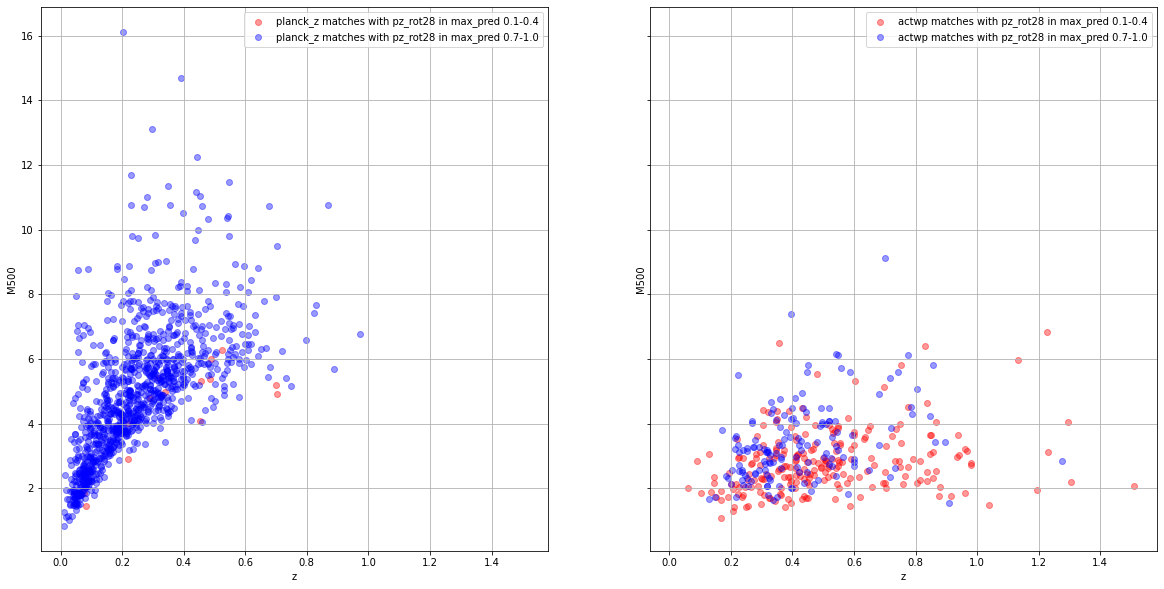

In [19]:
_, ax = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)
for i, cat in enumerate(['planck_z', 'actwp']):
    cur_df = pz_rot[pz_rot['catalog'] == cat]
    cur_df = cur_df[cur_df['status'] == 'tp']
    for st, en, c in [(0.1, 0.4, 'r'), (0.7, 1.0, 'b')]:
        df = cur_df[cur_df['max_pred'] <= en]
        df = df[df['max_pred'] >= st]
        s = ax[i].scatter(df['z'], df['M500'], c=c, alpha=0.4)
        s.set_label('{cat} matches with pz_rot28 in max_pred {min_p}-{max_p}'.format(
            cat=cat, min_p=st, max_p=en))
    ax[i].set_xlabel('z')
    ax[i].set_ylabel('M500')
    ax[i].grid()
    ax[i].legend()